# Workbook

Use this notebook to complete the exercises throughout the workshop.

#### Table of Contents
- [Section 1 &ndash; Getting Started with Pandas](#Section-1)
- [Section 2 &ndash; Data Wrangling](#Section-2)
- [Section 3 &ndash; Data Visualization](#Section-3)

--- 

### Section 1

#### Exercise 1.1
##### Create a DataFrame by reading in the `2019_Yellow_Taxi_Trip_Data.csv` file. Examine the first 5 rows.

In [2]:
import pandas as pd
data = pd.read_csv('2019_Yellow_Taxi_Trip_Data.csv')
data.iloc[0:5]

,vendorid,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,ratecodeid,store_and_fwd_flag,pulocationid,dolocationid,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
0,2,2019-10-23T16:39:42.000,2019-10-23T17:14:10.000,1,7.93,1,N,138,170,1,29.5,1.0,0.5,7.98,6.12,0.3,47.90,2.5
1,1,2019-10-23T16:32:08.000,2019-10-23T16:45:26.000,1,2.00,1,N,11,26,1,10.5,1.0,0.5,0.00,0.00,0.3,12.30,0.0
2,2,2019-10-23T16:08:44.000,2019-10-23T16:21:11.000,1,1.36,1,N,163,162,1,9.5,1.0,0.5,2.00,0.00,0.3,15.80,2.5
3,2,2019-10-23T16:22:44.000,2019-10-23T16:43:26.000,1,1.00,1,N,170,163,1,13.0,1.0,0.5,4.32,0.00,0.3,21.62,2.5
4,2,2019-10-23T16:45:11.000,2019-10-23T16:58:49.000,1,1.96,1,N,163,236,1,10.5,1.0,0.5,0.50,0.00,0.3,15.30,2.5


#### Exercise 1.2
##### Find the dimensions (number of rows and number of columns) in the data.

In [7]:
row_c = data.shape[0]
print("Rows: " + str(row_c))

Rows: 10000


In [6]:
col_c = data.shape[1]
print("Columns: " + str(col_c))

Columns: 18


#### Exercise 1.3
##### Using the data in the `2019_Yellow_Taxi_Trip_Data.csv` file, calculate summary statistics for the `fare_amount`, `tip_amount`, `tolls_amount`, and `total_amount` columns.

In [18]:
data[["fare_amount", "tip_amount", "tolls_amount", "total_amount"]].describe()

,fare_amount,tip_amount,tolls_amount,total_amount
count,10000.000000,10000.000000,10000.000000,10000.000000
mean,15.106313,2.634494,0.623447,22.564659
std,13.954762,3.409800,6.437507,19.209255
min,-52.000000,0.000000,-6.120000,-65.920000
25%,7.000000,0.000000,0.000000,12.375000
50%,10.000000,2.000000,0.000000,16.300000
75%,16.000000,3.250000,0.000000,22.880000
max,176.000000,43.000000,612.000000,671.800000


#### Exercise 1.4
##### Isolate the `fare_amount`, `tip_amount`, `tolls_amount`, and `total_amount` for the longest trip by distance (`trip_distance`).

In [25]:
lt = data.loc[data["trip_distance"].idxmax()]
lt.loc[["fare_amount", "tip_amount", "tolls_amount", "total_amount"]]

fare_amount      176.0
tip_amount       18.29
tolls_amount      6.12
total_amount    201.21
Name: 8338, dtype: object

---

### Section 2

#### Exercise 2.1
##### Read in the meteorite data from the `Meteorite_Landings.csv` file, rename the `mass (g)` column to `mass`, and drop all the latitude and longitude columns. Sort the result by mass in descending order.

In [44]:
data = pd.read_csv('Meteorite_Landings.csv') # import data
data.rename(columns={'mass (g)': 'mass'}).drop(['reclat', 'reclong', 'GeoLocation'], axis=1).sort_values(by='mass')

,name,id,nametype,recclass,mass,fall,year
31063,Österplana 050,56149,Relict,Relict OC,0.0,Found,01/01/2003 12:00:00 AM
31062,Österplana 049,56148,Relict,Relict OC,0.0,Found,01/01/2012 12:00:00 AM
31075,Österplana 062,56161,Relict,Relict OC,0.0,Found,01/01/2010 12:00:00 AM
12640,Gove,52859,Relict,Relict iron,0.0,Found,01/01/1979 12:00:00 AM
31064,Österplana 051,56150,Relict,Relict OC,0.0,Found,01/01/2006 12:00:00 AM
...,...,...,...,...,...,...,...
38282,Wei-hui-fu (a),24231,Valid,Iron,NaN,Found,01/01/1931 12:00:00 AM
38283,Wei-hui-fu (b),24232,Valid,Iron,NaN,Found,01/01/1931 12:00:00 AM
38285,Weiyuan,24233,Valid,Mesosiderite,NaN,Found,01/01/1978 12:00:00 AM
41472,Yamato 792768,28117,Valid,CM2,NaN,Found,01/01/1979 12:00:00 AM


#### Exercise 2.2
##### Using the meteorite data from the `Meteorite_Landings.csv` file, update the `year` column to only contain the year, convert it to a numeric data type, and create a new column indicating whether the meteorite was observed falling before 1970. Set the index to the `id` column and extract all the rows with IDs between 10,036 and 10,040 (inclusive) with `loc[]`.

###### **Hint 1**: Use `year.str.slice()` to grab a substring.

###### **Hint 2**: Make sure to sort the index before using `loc[]` to select the range.

###### **Bonus**: There's a data entry error in the `year` column. Can you find it? (Don't spend too much time on this.)

In [ ]:
# new cell for finding the error in year. It's a bit easier to work with in a separate
# cell as the rest of the output doesn't really interest me for now
# first hunch from a previous error I got, when slicing and converting the year column:
# there might be a null value. Let's check if there is
data.isnull().values.any() # >>> np.True_ -> there is a null/NaN value preset in year, let's find it
data[data['year'].isnull()] # profit.

In [72]:
data['year'] = pd.to_numeric(data['year'].str.slice(6,10), errors='coerce').astype('Int32')
# astype not necessarily needed, but much prettier than a float value
data['before_1970'] = data['year'] < 1970
data.set_index('id').sort_values(by='id').loc[10036:10041]
#data.set_index('id').sort_values(by='id').loc[45700] checking if NaN is propagated as expected

             name     id nametype              recclass  mass (g)   fall year  \
0          Aachen      1    Valid                    L5      21.0   Fell  NaN   
1          Aarhus      2    Valid                    H6     720.0   Fell  NaN   
2            Abee      6    Valid                   EH4  107000.0   Fell  NaN   
3        Acapulco     10    Valid           Acapulcoite    1914.0   Fell  NaN   
4         Achiras    370    Valid                    L6     780.0   Fell  NaN   
...           ...    ...      ...                   ...       ...    ...  ...   
45711  Zillah 002  31356    Valid               Eucrite     172.0  Found  NaN   
45712      Zinder  30409    Valid  Pallasite, ungrouped      46.0  Found  NaN   
45713        Zlin  30410    Valid                    H4       3.3  Found  NaN   
45714   Zubkovsky  31357    Valid                    L6    2167.0  Found  NaN   
45715  Zulu Queen  30414    Valid                  L3.7     200.0  Found  NaN   

         reclat    reclong 

#### Exercise 2.3
##### Using the meteorite data from the `Meteorite_Landings.csv` file, create a pivot table that shows both the number of meteorites and the 95th percentile of meteorite mass for those that were found versus observed falling per year from 2005 through 2009 (inclusive). Hint: Be sure to convert the `year` column to a number as we did in the previous exercise.

In [3]:
data = pd.read_csv('Meteorite_Landings.csv') # import data
data['year'] = pd.to_numeric(data['year'].str.slice(6,10), errors='coerce').astype('Int32')
fd = data[(data['year'] >= 2005) & (data['year'] <= 2009)] # cut rows
fd = fd[['year', 'fall', 'mass (g)']] # cut columns
pt = pd.pivot_table(
    fd,
    columns=['year','fall'],
    values=['mass (g)'],
    aggfunc={'fall': ['count'],
            'mass (g)': [lambda x: x.quantile(0.95)]}
)
pt

year                 2005     2006             2007              2008          \
fall                Found     Fell   Found     Fell   Found      Fell   Found   
fall     count      875.0      5.0  2451.0      8.0  1181.0       9.0   948.0   
mass (g) <lambda>  4500.0  25008.0  1600.5  89675.0  1126.9  106000.0  2274.8   

year                 2009           
fall                 Fell    Found  
fall     count        5.0  1492.00  
mass (g) <lambda>  8333.4  1397.25

#### Exercise 2.4
##### Using the meteorite data from the `Meteorite_Landings.csv` file, compare summary statistics of the mass column for the meteorites that were found versus observed falling.

In [5]:
# I'm honestly not sure if the result is correct tbh
data = pd.read_csv('Meteorite_Landings.csv') # import clean data
fd = data[['mass (g)', 'fall']] # cut columns
pt = pd.pivot_table(
    fd,
    columns=['fall'],
    values=['mass (g)'],
    aggfunc={'mass (g)': 'describe'}
)
pt

fall                    Fell         Found
mass (g) 25%    6.860000e+02  6.940000e+00
         50%    2.800000e+03  3.050000e+01
         75%    1.045000e+04  1.780000e+02
         count  1.075000e+03  4.451000e+04
         max    2.300000e+07  6.000000e+07
         mean   4.707072e+04  1.246192e+04
         min    1.000000e-01  0.000000e+00
         std    7.170671e+05  5.711058e+05

#### Exercise 2.5
##### Using the taxi trip data in the `2019_Yellow_Taxi_Trip_Data.csv` file, resample the data to an hourly frequency based on the dropoff time. Calculate the total `trip_distance`, `fare_amount`, `tolls_amount`, and `tip_amount`, then find the 5 hours with the most tips.

In [6]:
data = pd.read_csv('2019_Yellow_Taxi_Trip_Data.csv',        # import data
                parse_dates=['tpep_dropoff_datetime'],      # cast datetime
                index_col=['tpep_dropoff_datetime'])        # set index for resample
data = data[[
    'trip_distance', 'fare_amount', 'tolls_amount', 'tip_amount'    # cut all irrelevant rows
    ]].resample('h').sum().nlargest(                                # resample hourly, sum relevant columns
        n=5, columns='tip_amount'                                   # find hours with largest tip amount
        )
data

,trip_distance,fare_amount,tolls_amount,tip_amount
tpep_dropoff_datetime,,,,
2019-10-23 16:00:00,10676.95,67797.76,699.04,12228.64
2019-10-23 17:00:00,16052.83,70131.91,4044.04,12044.03
2019-10-23 18:00:00,3104.56,11565.56,1454.67,1907.64
2019-10-23 15:00:00,14.34,213.50,0.00,51.75
2019-10-23 19:00:00,98.59,268.00,24.48,25.74


--- 

### Section 3

#### Exercise 3.1
##### Using the TSA traveler throughput data in the `tsa_melted_holiday_travel.csv` file, create box plots for traveler throughput for each year in the data. Hint: Pass `kind='box'` into the `plot()` method to generate box plots.

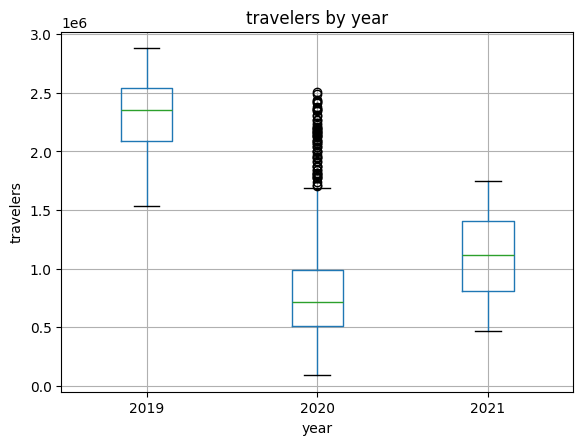

In [7]:
import matplotlib.pyplot as plt                         # import for customization
data = pd.read_csv('tsa_melted_holiday_travel.csv')     # import data
data.boxplot(column='travelers', by='year')             # generate boxplot
plt.title('travelers by year')                          # change title because the default title sucks
plt.suptitle('')                                        # hide the shitty default title
plt.ylabel('travelers')                                 # add y label
plt.show()                                              # show plt changes

#### Exercise 3.2
##### Using the TSA traveler throughput data in the `tsa_melted_holiday_travel.csv` file, create a heatmap that shows the 2019 TSA median traveler throughput by day of week and month.

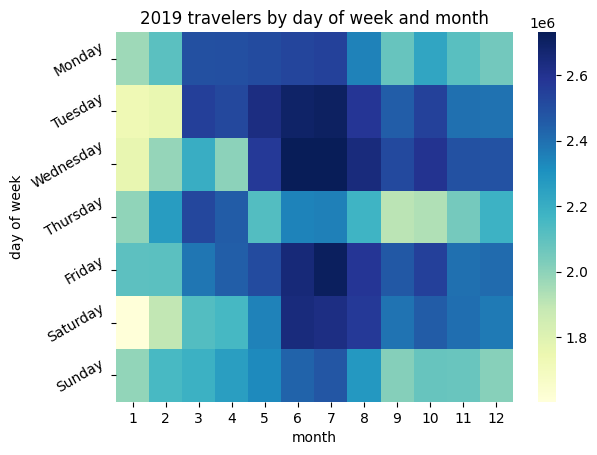

In [8]:
import seaborn as sns                                   # use seaborn for heatmap 'cause it's pretty
import matplotlib.pyplot as plt                         # plt for labels and such
data = pd.read_csv('tsa_melted_holiday_travel.csv')     # import data
data['date'] = pd.to_datetime(data['date'])             # convert to date-time
data = data[(data['year'] == 2019)]
data['dow'] = data['date'].dt.day_name()                # get day names
data['month'] = data['date'].dt.month                   # get months

# create pivot table to calculate relevant data
pt = data.pivot_table(
    values='travelers',
    index='dow',
    columns='month',
    aggfunc='median'
)
# reindex in correct order of day of the week
pt = pt.reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
# generate heatmap using seaborn (and pretty colors)
sns.heatmap(pt, cmap='YlGnBu')

# make stuff make sense with ✧･ﾟ labels ✧･ﾟ
plt.title('2019 travelers by day of week and month')
plt.ylabel('day of week')
plt.yticks(rotation=30)
plt.show()

#### Exercise 3.3
##### Annotate the medians in the box plot from *[Exercise 3.1](#Exercise-3.1)*. Hint: The `x` coordinates will be 1, 2, and 3 for 2019, 2020, and 2021, respectively. Alternatively, to avoid hardcoding values, you can use the `Axes.get_xticklabels()` method, in which case you should look at the [documentation](https://matplotlib.org/stable/api/text_api.html) for the `Text` class.

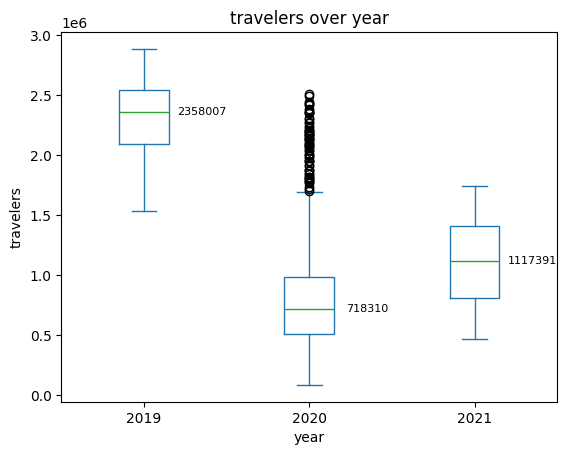

In [9]:
import matplotlib.pyplot as plt
import pandas as pd
data = pd.read_csv('tsa_melted_holiday_travel.csv')

# well I didn't need to annotate the years in 3.1, because I used boxplot() instead of plot
# for ease of use.
# So I did it again, using plot, but made life easier for me by creating a pivot table first.
# Again, there's no need for separate plots or subplot-schenanigans because of groupby. Personally
# I find it much easier to use this way, instead of creating separate plots (which of course would
# be very easy, just plot over groupby, change the labels and use plt to make the plots a bit easier to read)
# but why would I want to write so many lines of code for the same thing? Anyway, I digress.

pt = data.pivot(columns='year', values='travelers')     # create pivot table
medians = pt.median()                                   # get a list of medians
plot = pt.plot(kind='box')                              # plot
for i, median in enumerate(medians):                    # annotate the medians
    plot.annotate(f'{median:.0f}', xy=(i+1.35, median),
                  ha='center', va='center', fontsize=8)

# plt for prettiness.
plt.title('travelers over year')
plt.suptitle('')
plt.ylabel('travelers')
plt.xlabel('year')
plt.show()